# <b>Probelm <b>

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
    

# <b>Content<b>

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where they have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# Approach

    1) Data Analysis - Shape, Data Type, Info
    2) Basic Statistical Inference - Describe 
    3) Missing Value Imputation and if, so Treating it
    4) Transforming 'Time' and 'Amount' with PCA.(As they are the only left one)
    5) Univariate Analysis:
        5.1) Class
    6) Bivariate Analysis:
        6.1) Time and Amount
        6.2) Amount and Class
    7) Baseline Model - RF, DT, Ensemble Modelling
    8) Correaltion matrix and heatmap
    9) Outliers Detection and if, so removing them
    10) Standardization
    11) Feature Engineering
    12) Model Building
        



1) Problem Statement

2) Load data

3) Baseline Model

4) Data Analysis - Shape, Data Type, Info

5) Basic Statistical Inference - Describe

# Imports

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost 
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from imblearn.over_sampling import ADASYN
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:

pd.options.display.max_columns = 50


pd.options.display.max_rows = None


np.set_printoptions(suppress=True)

# Read Data 

In [6]:
data = pd.read_csv("C:/Users/Acer/Downloads/creditcard.csv")

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.shape

(284807, 31)

#### Dimension of Data

In [6]:
data.shape

(284807, 31)

# Data Analysis and Preparation 

## Data Type

In [7]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## Missing Value Imputation

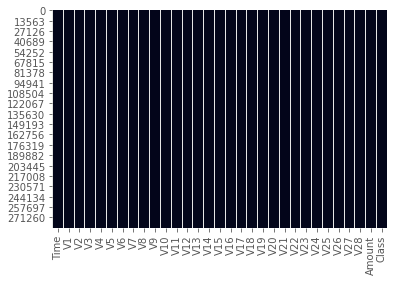

In [8]:
sns.heatmap(data.isnull(), cbar=False);

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<b>There are no missing values in the data

## Describe

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Drop duplicates

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(283726, 31)

<b>So, we were having around ~1000 duplicate transactions.

## Determine number of fraud cases in dataset

In [13]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0016698852262818046
Fraud Cases: 473
Valid Transactions: 283253


<b>Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced. Lets first apply our models without balancing it and if we don’t get a good accuracy then we can find a way to balance this dataset. But first, let’s implement the model without it and will balance the data only if needed.

# BASELINE MODEL

## Separating the X and the Y values

In [14]:

# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing 
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(283726, 30)
(283726,)


## Train-Test split

In [15]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

## Model Building

### Random Forest Model

In [16]:
# Building the Random Forest Classifier (RANDOM FOREST)
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)


In [17]:
rf_acc = accuracy_score(yTest, yPred)
print('Accuracy score of the Random Forest model is {}'.format(rf_acc))

rf_f1 = f1_score(yTest, yPred)
print('F1 score of the Random Forest model is {}'.format(rf_f1))
      
rf_recall = recall_score(yTest, yPred)
print('Recall score of the Random Forest model is {}'.format(rf_recall))

rf_precision = precision_score(yTest, yPred)
print('Precision score of the Random Forest model is {}'.format(rf_precision))

Accuracy score of the Random Forest model is 0.9995418179254926
F1 score of the Random Forest model is 0.8333333333333333
Recall score of the Random Forest model is 0.7222222222222222
Precision score of the Random Forest model is 0.9848484848484849


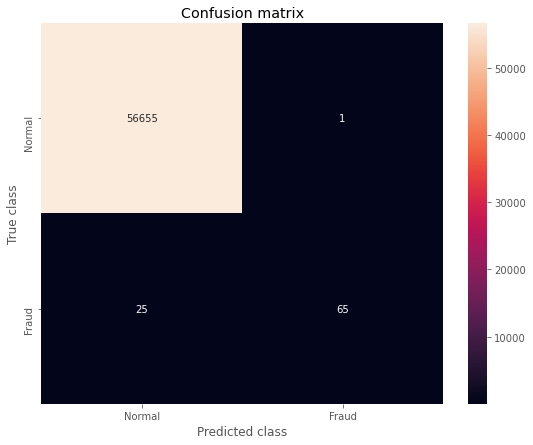

In [18]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(9,7))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [19]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE
# create a list of column names
cols = ['Model', 'ACCURACY', 'F1 SCORE', 'RECALL']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
rf_metric = pd.Series({'Model':"Random Forest",
                     'ACCURACY':rf_acc,
                     'F1 SCORE':rf_f1 , 
                     'RECALL': rf_recall,
                     'PRECISION': rf_precision
                      })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(rf_metric, ignore_index = True)

# print the result table
result_tabulation

,Model,ACCURACY,F1 SCORE,RECALL,PRECISION
0,Random Forest,0.999542,0.833333,0.722222,0.984848


### Decision Tree

In [20]:
dt = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
dt.fit(xTrain, yTrain)
# predictions
yPred = dt.predict(xTest)

In [21]:
dt_acc= accuracy_score(yTest, yPred)
print('Accuracy score of the Decision Tree model is {}'.format(dt_acc))

dt_f1 = f1_score(yTest, yPred)
print('F1 score of the Random Decision Tree is {}'.format(dt_f1))

dt_recall = recall_score(yTest, yPred)
print('Recall score of the Decision Tree model is {}'.format(dt_recall))

dt_precision = precision_score(yTest, yPred)
print('Precision score of the Decision Tree model is {}'.format(dt_precision))


Accuracy score of the Decision Tree model is 0.9993479716632009
F1 score of the Random Decision Tree is 0.783625730994152
Recall score of the Decision Tree model is 0.7444444444444445
Precision score of the Decision Tree model is 0.8271604938271605


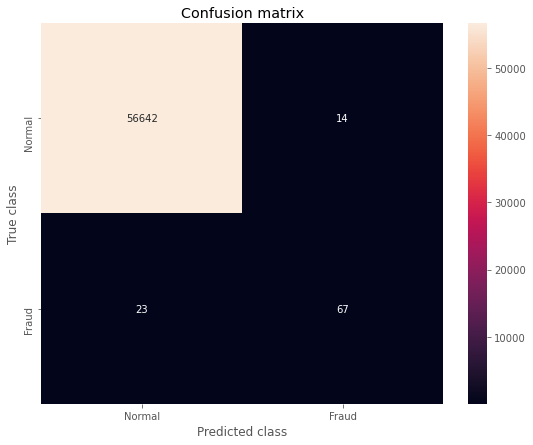

In [22]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(9,7))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [23]:
# compile the required information
dt_metric = pd.Series({'Model':"Decision Tree",
                     'ACCURACY':dt_acc,
                     'F1 SCORE':dt_f1 , 
                     'RECALL': dt_recall,
                       'PRECISION': dt_precision
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(dt_metric, ignore_index = True)

# print the result table
result_tabulation

,Model,ACCURACY,F1 SCORE,RECALL,PRECISION
0,Random Forest,0.999542,0.833333,0.722222,0.984848
1,Decision Tree,0.999348,0.783626,0.744444,0.827160


### K-Nearest Neighbors

In [24]:
n = 7
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(xTrain, yTrain)
# predictions
yPred = knn.predict(xTest)

In [25]:
knn_acc = accuracy_score(yTest, yPred)
print('Accuracy score of the KNN model is {}'.format(knn_acc))

knn_f1 = f1_score(yTest, yPred)
print('F1 score of the KNN Tree is {}'.format(knn_f1))

knn_recall = recall_score(yTest, yPred)
print('Recall score of the KNN model is {}'.format(knn_recall))

knn_precision = precision_score(yTest, yPred)
print('Precision score of the KNN model is {}'.format(knn_precision))

Accuracy score of the KNN model is 0.9984492299016671
F1 score of the KNN Tree is 0.04347826086956522
Recall score of the KNN model is 0.022222222222222223
Precision score of the KNN model is 1.0


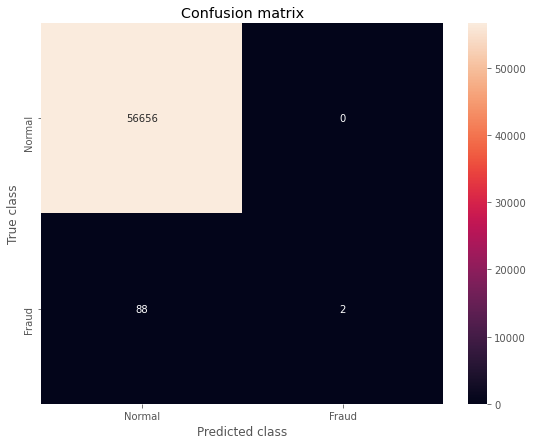

In [26]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(9,7))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [27]:
# compile the required information
knn_metric = pd.Series({'Model':"K-Nearest Neighbors",
                     'ACCURACY':knn_acc,
                     'F1 SCORE':knn_f1 , 
                     'RECALL': knn_recall,
                     'PRECISION': knn_precision
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(knn_metric, ignore_index = True)

# print the result table
result_tabulation

,Model,ACCURACY,F1 SCORE,RECALL,PRECISION
0,Random Forest,0.999542,0.833333,0.722222,0.984848
1,Decision Tree,0.999348,0.783626,0.744444,0.827160
2,K-Nearest Neighbors,0.998449,0.043478,0.022222,1.000000


### Logistic Regression 

In [28]:
lr = LogisticRegression()
lr.fit(xTrain, yTrain)
#predictions
yPred = lr.predict(xTest)

In [29]:
lr_acc = accuracy_score(yTest, yPred)
print('Accuracy score of the Logistic Regression model is {}'.format(lr_acc))

lr_f1 = f1_score(yTest, yPred)
print('F1 score of the Logistic Regression is {}'.format(lr_f1))


lr_recall = recall_score(yTest, yPred)
print('Recall score of the Logistic Regression model is {}'.format(lr_recall))

lr_precision = precision_score(yTest, yPred)
print('Precision score of the Logistic Regression model is {}'.format(lr_precision))

Accuracy score of the Logistic Regression model is 0.999048391076023
F1 score of the Logistic Regression is 0.6707317073170732
Recall score of the Logistic Regression model is 0.6111111111111112
Precision score of the Logistic Regression model is 0.7432432432432432


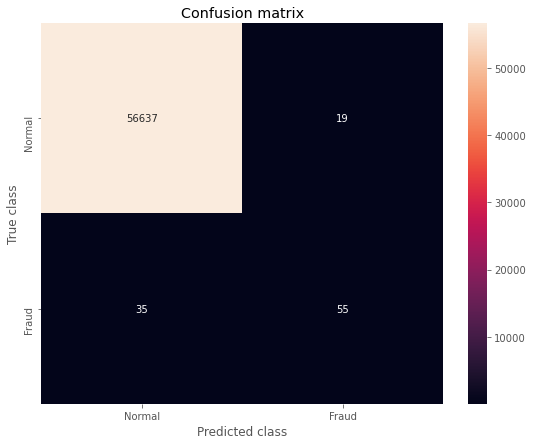

In [30]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(9,7))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [31]:
# compile the required information
lr_metric = pd.Series({'Model':" Logistic Regression",
                     'ACCURACY':lr_acc,
                     'F1 SCORE':lr_f1 , 
                     'RECALL': lr_recall,
                    'PRECISION': lr_precision
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(lr_metric, ignore_index = True)

# print the result table
result_tabulation

,Model,ACCURACY,F1 SCORE,RECALL,PRECISION
0,Random Forest,0.999542,0.833333,0.722222,0.984848
1,Decision Tree,0.999348,0.783626,0.744444,0.827160
2,K-Nearest Neighbors,0.998449,0.043478,0.022222,1.000000
3,Logistic Regression,0.999048,0.670732,0.611111,0.743243


### Support Vector Machine 

In [32]:
svm = SVC()
svm.fit(xTrain, yTrain)
#predictions
yPred = svm.predict(xTest)

In [33]:
svm_acc = accuracy_score(yTest, yPred)
print('Accuracy score of the svm model is {}'.format(svm_acc))

svm_f1 = f1_score(yTest, yPred)
print('F1 score of the svm is {}'.format(svm_f1))

svm_recall = recall_score(yTest, yPred)
print('Recall score of the svm model is {}'.format(svm_recall))

svm_precision = precision_score(yTest, yPred)
print('Precision score of the  svm model is {}'.format(svm_precision))

Accuracy score of the svm model is 0.998413985126705
F1 score of the svm is 0.0
Recall score of the svm model is 0.0
Precision score of the  svm model is 0.0


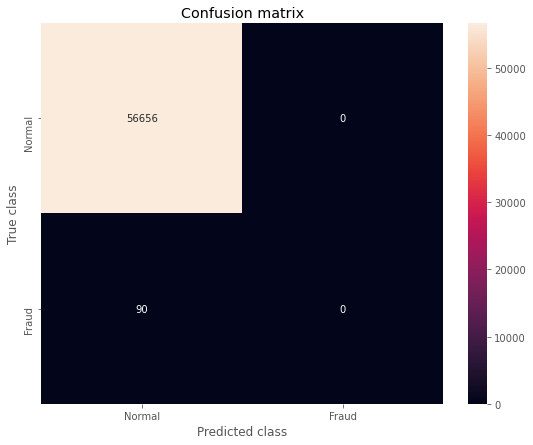

In [34]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(9,7))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [35]:
# compile the required information
svm_metric = pd.Series({'Model':" Support Vector Machine",
                     'ACCURACY':svm_acc,
                     'F1 SCORE':svm_f1 , 
                     'RECALL': svm_recall,
                     'PRECISION': svm_precision
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(svm_metric, ignore_index = True)

# print the result table
result_tabulation

,Model,ACCURACY,F1 SCORE,RECALL,PRECISION
0,Random Forest,0.999542,0.833333,0.722222,0.984848
1,Decision Tree,0.999348,0.783626,0.744444,0.827160
2,K-Nearest Neighbors,0.998449,0.043478,0.022222,1.000000
3,Logistic Regression,0.999048,0.670732,0.611111,0.743243
4,Support Vector Machine,0.998414,0.000000,0.000000,0.000000


### XGboost 

In [36]:
xgb = XGBClassifier()
xgb.fit(xTrain, yTrain)
#predictions
yPred = xgb.predict(xTest)

[00:55:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
xg_acc = accuracy_score(yTest, yPred)
print('Accuracy score of the XGboost model is {}'.format(xg_acc))

xg_f1 = f1_score(yTest, yPred)
print('F1 score of the XGboost is {}'.format(xg_f1))

xg_recall = recall_score(yTest, yPred)
print('Recall score of the XGboost model is {}'.format(xg_recall))

xg_precision = precision_score(yTest, yPred)
print('Precision score of the  XGboost model is {}'.format(xg_precision))

Accuracy score of the XGboost model is 0.9995770627004547
F1 score of the XGboost is 0.85
Recall score of the XGboost model is 0.7555555555555555
Precision score of the  XGboost model is 0.9714285714285714


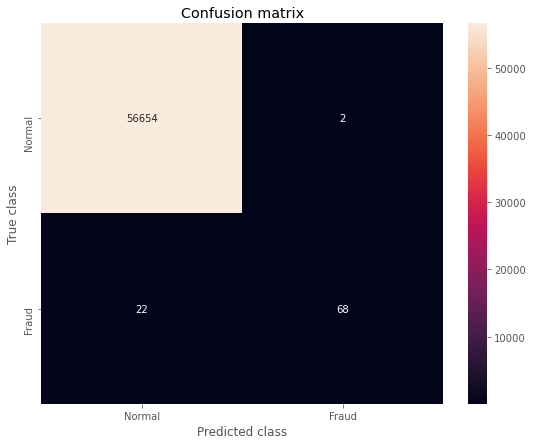

In [38]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(9,7))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [39]:
# compile the required information
xg_metric = pd.Series({'Model':"XGboost",
                     'ACCURACY':xg_acc,
                     'F1 SCORE':xg_f1 , 
                     'RECALL': xg_recall
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(xg_metric, ignore_index = True)

# print the result table
result_tabulation

,Model,ACCURACY,F1 SCORE,RECALL,PRECISION
0,Random Forest,0.999542,0.833333,0.722222,0.984848
1,Decision Tree,0.999348,0.783626,0.744444,0.827160
2,K-Nearest Neighbors,0.998449,0.043478,0.022222,1.000000
3,Logistic Regression,0.999048,0.670732,0.611111,0.743243
4,Support Vector Machine,0.998414,0.000000,0.000000,0.000000
5,XGboost,0.999577,0.850000,0.755556,NaN


<b>Hence, for now the baseline model giving highest Recall is XGboost with recall % as 75.56

# Visualization

## fraud vs. normal transactions 

In [40]:
counts = data.Class.value_counts()

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

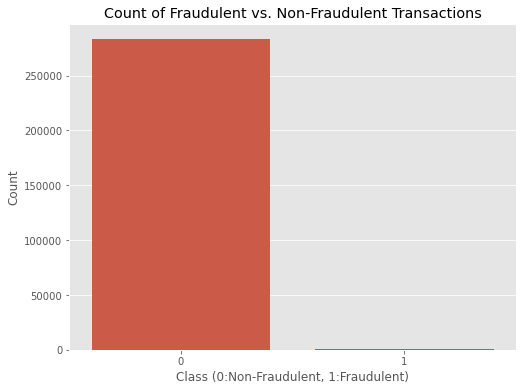

In [41]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

## amount details for Fraudulent Transaction

In [42]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()


Amount details of the fraudulent transaction


count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

## Print the amount details for Normal Transaction



In [43]:
print("Amount details of the normal transaction")
valid.Amount.describe()

Amount details of the normal transaction


count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

<AxesSubplot:title={'center':'Distribution of Monetary Value Feature'}, xlabel='Amount', ylabel='Density'>

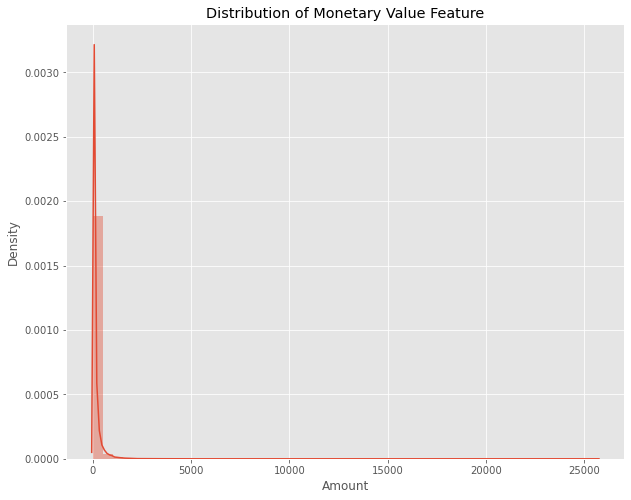

In [44]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(data.Amount)

<div class="burk">
Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.</div><i class="fa fa-lightbulb-o "></i>

## Plotting the Correlation Matrix

In [45]:
corr = data.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,0.031068,-0.248536,0.125500,-0.065958,-0.100316,-0.184392,0.011286,-0.073819,0.090305,0.029537,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.003345,-0.003491,-0.003535,0.000919,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,0.004013,0.003244,0.002477,-0.000358,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.004430,-0.008159,-0.003495,-0.000016,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.003346,0.003655,0.002325,-0.000560,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.002373,-0.004466,-0.002685,0.000436,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.000122,-0.001716,0.000541,0.000106,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,-0.005944,-0.008794,-0.004279,0.000846,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.004376,-0.005576,-0.001323,-0.000626,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.000086,-0.002318,-0.000373,0.000247,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


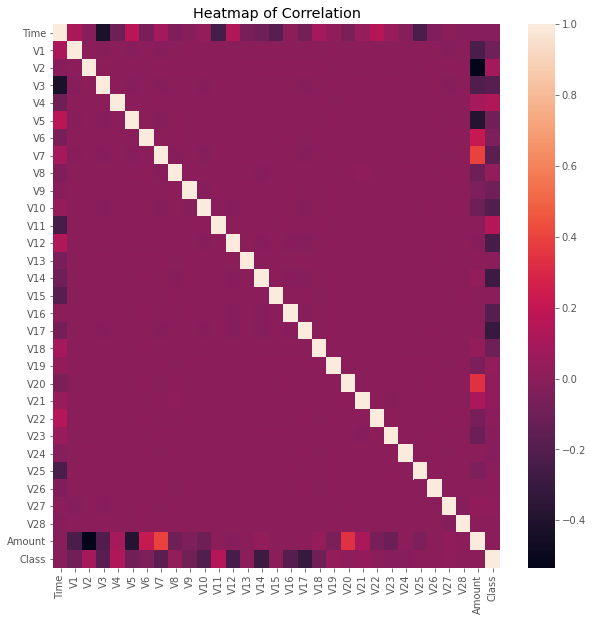

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.title('Heatmap of Correlation');

# Scaling

## Scaling Amount and Time

In [47]:
# define standard scaler
scaler = StandardScaler()

In [48]:
max(data.Amount)-min(data.Amount)

25691.16

I have observed in our data 28 features are transformed versions of PCA but the Amount is the original one. And, while checking the minimum and maximum is in the amount — I found the difference is huge that can deviate our result.

In [49]:
#Scaling Time
scaled_time = pd.DataFrame(scaler.fit_transform(data['Time'].values.reshape(-1, 1)))
scaled_time.rename(columns={scaled_time.columns[0]: 'scaled_time'},inplace = True)
scaled_time.head()

,scaled_time
0,-1.996823
1,-1.996823
2,-1.996802
3,-1.996802
4,-1.996781


In [50]:
#scaling the amount column
scaled_amount = pd.DataFrame(scaler.fit_transform(data['Amount'].values.reshape(-1, 1)))
scaled_amount.rename(columns={scaled_amount.columns[0]: 'scaled_amount'},inplace = True)
scaled_amount.head()

,scaled_amount
0,0.244200
1,-0.342584
2,1.158900
3,0.139886
4,-0.073813


In [51]:
#concatenating newly created columns with original df
data = pd.concat([data, scaled_amount, scaled_time], axis=1)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.244200,-1.996823
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,-0.342584,-1.996823
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1.158900,-1.996802
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.139886,-1.996802
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,-0.073813,-1.996781


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

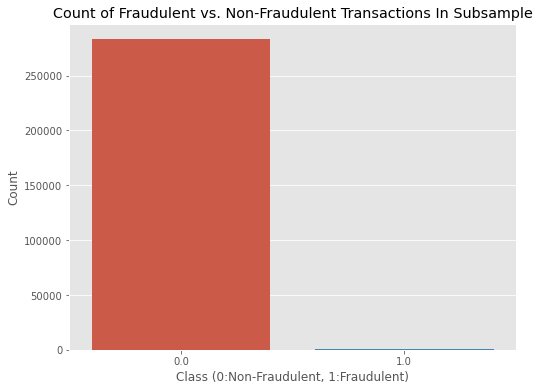

In [52]:
new_counts = data.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

<b>Now running the models one more time

dropping missing values

In [53]:
data.dropna(inplace = True)

## Separating the X and the Y values

In [54]:

# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing 
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(282647, 32)
(282647,)


## Train-Test split

In [55]:

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

## Model Building

### Random Forest Model

In [56]:
# Building the Random Forest Classifier (RANDOM FOREST)
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)


In [57]:
rf_acc = accuracy_score(yTest, yPred)
print('Accuracy score of the Random Forest model is {}'.format(rf_acc))

rf_f1 = f1_score(yTest, yPred)
print('F1 score of the Random Forest model is {}'.format(rf_f1))
      
rf_recall = recall_score(yTest, yPred)
print('Recall score of the Random Forest model is {}'.format(rf_recall))

rf_precision = precision_score(yTest, yPred)
print('Precision score of the Random Forest model is {}'.format(rf_precision))

Accuracy score of the Random Forest model is 0.9995931363877587
F1 score of the Random Forest model is 0.8606060606060606
Recall score of the Random Forest model is 0.7802197802197802
Precision score of the Random Forest model is 0.9594594594594594


In [58]:
cols = ['Model', 'ACCURACY', 'F1 SCORE', 'RECALL']

result = pd.DataFrame(columns = cols)

# compile the required information
rf_metric = pd.Series({'Model':"Random Forest",
                     'ACCURACY':rf_acc,
                     'F1 SCORE':rf_f1 , 
                     'RECALL': rf_recall,
                     'PRECISION': rf_precision
                   })

result = result.append(rf_metric, ignore_index = True)

# print the result table
result

,Model,ACCURACY,F1 SCORE,RECALL,PRECISION
0,Random Forest,0.999593,0.860606,0.78022,0.959459


### Decision Tree

In [59]:
dt = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
dt.fit(xTrain, yTrain)
# predictions
yPred = dt.predict(xTest)

In [60]:
dt_acc= accuracy_score(yTest, yPred)
print('Accuracy score of the Decision Tree model is {}'.format(dt_acc))

dt_f1 = f1_score(yTest, yPred)
print('F1 score of the Random Decision Tree is {}'.format(dt_f1))

dt_recall = recall_score(yTest, yPred)
print('Recall score of the Decision Tree model is {}'.format(dt_recall))

dt_precision = precision_score(yTest, yPred)
print('Precision score of the Decision Tree model is {}'.format(dt_precision))

Accuracy score of the Decision Tree model is 0.9994339288873164
F1 score of the Random Decision Tree is 0.8072289156626506
Recall score of the Decision Tree model is 0.7362637362637363
Precision score of the Decision Tree model is 0.8933333333333333


In [61]:
# compile the required information
dt_metric = pd.Series({'Model':"Decision Tree",
                     'ACCURACY':dt_acc,
                     'F1 SCORE':dt_f1 , 
                     'RECALL': dt_recall,
                    'PRECISION': dt_precision
                   })

result = result.append(dt_metric, ignore_index = True)

# print the result table
result

,Model,ACCURACY,F1 SCORE,RECALL,PRECISION
0,Random Forest,0.999593,0.860606,0.780220,0.959459
1,Decision Tree,0.999434,0.807229,0.736264,0.893333


### K-Nearest Neighbors

In [62]:
n = 7
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(xTrain, yTrain)
# predictions
yPred = knn.predict(xTest)

In [63]:
knn_acc = accuracy_score(yTest, yPred)
print('Accuracy score of the KNN model is {}'.format(knn_acc))

knn_f1 = f1_score(yTest, yPred)
print('F1 score of the KNN Tree is {}'.format(knn_f1))

knn_recall = recall_score(yTest, yPred)
print('Recall score of the KNN model is {}'.format(knn_recall))

knn_precision = precision_score(yTest, yPred)
print('Precision score of the KNN model is {}'.format(knn_precision))

Accuracy score of the KNN model is 0.998425614717849
F1 score of the KNN Tree is 0.043010752688172046
Recall score of the KNN model is 0.02197802197802198
Precision score of the KNN model is 1.0


In [64]:
# compile the required information
knn_metric = pd.Series({'Model':"K-Nearest Neighbors",
                     'ACCURACY':knn_acc,
                     'F1 SCORE':knn_f1 , 
                     'RECALL': knn_recall,
                     'PRECISION': knn_precision
                   })

result = result.append(knn_metric, ignore_index = True)

# print the result table
result

,Model,ACCURACY,F1 SCORE,RECALL,PRECISION
0,Random Forest,0.999593,0.860606,0.780220,0.959459
1,Decision Tree,0.999434,0.807229,0.736264,0.893333
2,K-Nearest Neighbors,0.998426,0.043011,0.021978,1.000000


### Logistic Regression

In [65]:
lr = LogisticRegression()
lr.fit(xTrain, yTrain)
#predictions
yPred = lr.predict(xTest)

In [66]:
lr_acc = accuracy_score(yTest, yPred)
print('Accuracy score of the Logistic Regression model is {}'.format(lr_acc))

lr_f1 = f1_score(yTest, yPred)
print('F1 score of the Logistic Regression is {}'.format(lr_f1))


lr_recall = recall_score(yTest, yPred)
print('Recall score of the Logistic Regression model is {}'.format(lr_recall))

lr_precision = precision_score(yTest, yPred)
print('Precision score of the Logistic Regression model is {}'.format(lr_precision))

Accuracy score of the Logistic Regression model is 0.9991685830532461
F1 score of the Logistic Regression is 0.7080745341614908
Recall score of the Logistic Regression model is 0.6263736263736264
Precision score of the Logistic Regression model is 0.8142857142857143


In [67]:
# compile the required information
lr_metric = pd.Series({'Model':" Logistic Regression",
                     'ACCURACY':lr_acc,
                     'F1 SCORE':lr_f1 , 
                     'RECALL': lr_recall,
                     'PRECISION': lr_precision
                   })

result = result.append(lr_metric, ignore_index = True)

# print the result table
result

,Model,ACCURACY,F1 SCORE,RECALL,PRECISION
0,Random Forest,0.999593,0.860606,0.780220,0.959459
1,Decision Tree,0.999434,0.807229,0.736264,0.893333
2,K-Nearest Neighbors,0.998426,0.043011,0.021978,1.000000
3,Logistic Regression,0.999169,0.708075,0.626374,0.814286


### Support Vector Machine

In [68]:
svm = SVC()
svm.fit(xTrain, yTrain)
#predictions
yPred = svm.predict(xTest)

In [69]:
svm_acc = accuracy_score(yTest, yPred)
print('Accuracy score of the svm model is {}'.format(svm_acc))

svm_f1 = f1_score(yTest, yPred)
print('F1 score of the svm is {}'.format(svm_f1))

svm_recall = recall_score(yTest, yPred)
print('Recall score of the svm model is {}'.format(svm_recall))

svm_precision = precision_score(yTest, yPred)
print('Precision score of the  svm model is {}'.format(svm_precision))

Accuracy score of the svm model is 0.9983902352733062
F1 score of the svm is 0.0
Recall score of the svm model is 0.0
Precision score of the  svm model is 0.0


In [70]:
# compile the required information
svm_metric = pd.Series({'Model':" Support Vector Machine",
                     'ACCURACY':svm_acc,
                     'F1 SCORE':svm_f1 , 
                     'RECALL': svm_recall,
                     'PRECISION': svm_precision
                   })

result = result.append(svm_metric, ignore_index = True)

# print the result table
result

,Model,ACCURACY,F1 SCORE,RECALL,PRECISION
0,Random Forest,0.999593,0.860606,0.780220,0.959459
1,Decision Tree,0.999434,0.807229,0.736264,0.893333
2,K-Nearest Neighbors,0.998426,0.043011,0.021978,1.000000
3,Logistic Regression,0.999169,0.708075,0.626374,0.814286
4,Support Vector Machine,0.998390,0.000000,0.000000,0.000000


### XGboost

In [71]:
xgb = XGBClassifier()
xgb.fit(xTrain, yTrain)
#predictions
yPred = xgb.predict(xTest)

[01:12:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [72]:
xg_acc = accuracy_score(yTest, yPred)
print('Accuracy score of the XGboost model is {}'.format(xg_acc))

xg_f1 = f1_score(yTest, yPred)
print('F1 score of the XGboost is {}'.format(xg_f1))

xg_recall = recall_score(yTest, yPred)
print('Recall score of the XGboost model is {}'.format(xg_recall))

xg_precision = precision_score(yTest, yPred)
print('Precision score of the  XGboost model is {}'.format(xg_precision))

Accuracy score of the XGboost model is 0.9996462055545728
F1 score of the XGboost is 0.8795180722891567
Recall score of the XGboost model is 0.8021978021978022
Precision score of the  XGboost model is 0.9733333333333334


In [73]:
# compile the required information
xg_metric = pd.Series({'Model':"XGboost",
                     'ACCURACY':xg_acc,
                     'F1 SCORE':xg_f1 , 
                     'RECALL': xg_recall,
                     'PRECISION': xg_precision
                   })

result = result.append(xg_metric, ignore_index = True)

# print the result table
result

,Model,ACCURACY,F1 SCORE,RECALL,PRECISION
0,Random Forest,0.999593,0.860606,0.780220,0.959459
1,Decision Tree,0.999434,0.807229,0.736264,0.893333
2,K-Nearest Neighbors,0.998426,0.043011,0.021978,1.000000
3,Logistic Regression,0.999169,0.708075,0.626374,0.814286
4,Support Vector Machine,0.998390,0.000000,0.000000,0.000000
5,XGboost,0.999646,0.879518,0.802198,0.973333


Since we can see XGbosst is the model giving highest recall value following by Random Forest and Decision which giving somewhat similar values. Hence, we will use only these 3 machine learning algorithm in building our model further.

# ADASYN

In [74]:
ada = ADASYN(sampling_strategy = 'minority', random_state = 420, n_neighbors = 5)
X_train_ada, y_train_ada = ada.fit_resample(xTrain, yTrain)
print('The number of classes before fit {}'.format(Counter(yTrain)))
print('The number of classes after fit {}'.format(Counter(y_train_ada)))

The number of classes before fit Counter({0.0: 225735, 1.0: 382})
The number of classes after fit Counter({1.0: 225820, 0.0: 225735})


### Decision Tree after ADASYN

In [75]:
dt = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
dt.fit(X_train_ada, y_train_ada)
# predictions
yPred = dt.predict(xTest)

In [76]:
dt_acc= accuracy_score(yTest, yPred)
print('Accuracy score of the Decision Tree model is {}'.format(dt_acc))

dt_f1 = f1_score(yTest, yPred)
print('F1 score of the Random Decision Tree is {}'.format(dt_f1))

dt_recall = recall_score(yTest, yPred)
print('Recall score of the Decision Tree model is {}'.format(dt_recall))

dt_precision = precision_score(yTest, yPred)
print('Precision score of the Decision Tree model is {}'.format(dt_precision))


Accuracy score of the Decision Tree model is 0.9814081018928003
F1 score of the Random Decision Tree is 0.13497942386831277
Recall score of the Decision Tree model is 0.9010989010989011
Precision score of the Decision Tree model is 0.07295373665480427


In [77]:
cols = ['Model', 'ACCURACY', 'F1 SCORE', 'RECALL']

result_ada = pd.DataFrame(columns = cols)


# compile the required information
dt_metric = pd.Series({'Model':"Decision Tree",
                     'ACCURACY':dt_acc,
                     'F1 SCORE':dt_f1 , 
                     'RECALL': dt_recall,
                     'PRECISION': dt_precision
                   })

result_ada = result_ada.append(dt_metric, ignore_index = True)

# print the result table
result_ada

,Model,ACCURACY,F1 SCORE,RECALL,PRECISION
0,Decision Tree,0.981408,0.134979,0.901099,0.072954


### Random Forest Model after ADASYN

In [78]:
# Building the Random Forest Classifier (RANDOM FOREST)
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train_ada, y_train_ada)
# predictions
yPred = rfc.predict(xTest)


In [79]:
rf_acc = accuracy_score(yTest, yPred)
print('Accuracy score of the Random Forest model is {}'.format(rf_acc))

rf_f1 = f1_score(yTest, yPred)
print('F1 score of the Random Forest model is {}'.format(rf_f1))
      
rf_recall = recall_score(yTest, yPred)
print('Recall score of the Random Forest model is {}'.format(rf_recall))

rf_precision = precision_score(yTest, yPred)
print('Precision score of the Random Forest model is {}'.format(rf_precision))

Accuracy score of the Random Forest model is 0.9995931363877587
F1 score of the Random Forest model is 0.8654970760233918
Recall score of the Random Forest model is 0.8131868131868132
Precision score of the Random Forest model is 0.925


In [80]:
rf_metric = pd.Series({'Model':"Random Forest",
                     'ACCURACY':rf_acc,
                     'F1 SCORE':rf_f1 , 
                     'RECALL': rf_recall,
                     'PRECISION': rf_precision
                   })

result_ada = result_ada.append(rf_metric, ignore_index = True)

# print the result table
result_ada

,Model,ACCURACY,F1 SCORE,RECALL,PRECISION
0,Decision Tree,0.981408,0.134979,0.901099,0.072954
1,Random Forest,0.999593,0.865497,0.813187,0.925000


### XGboost after ADASYN

In [81]:
xgb = XGBClassifier()
xgb.fit(X_train_ada, y_train_ada)
#predictions
yPred = xgb.predict(xTest)

[01:26:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [82]:
xg_acc = accuracy_score(yTest, yPred)
print('Accuracy score of the XGboost model is {}'.format(xg_acc))

xg_f1 = f1_score(yTest, yPred)
print('F1 score of the XGboost is {}'.format(xg_f1))

xg_recall = recall_score(yTest, yPred)
print('Recall score of the XGboost model is {}'.format(xg_recall))

xg_precision = precision_score(yTest, yPred)
print('Precision score of the  XGboost model is {}'.format(xg_precision))

Accuracy score of the XGboost model is 0.9995400672209447
F1 score of the XGboost is 0.8555555555555556
Recall score of the XGboost model is 0.8461538461538461
Precision score of the  XGboost model is 0.8651685393258427


In [83]:
# compile the required information
xg_metric = pd.Series({'Model':"XGboost",
                     'ACCURACY':xg_acc,
                     'F1 SCORE':xg_f1 , 
                     'RECALL': xg_recall,
                     'PRECISION': xg_precision
                   })

result_ada = result_ada.append(xg_metric, ignore_index = True)

# print the result table
result_ada

,Model,ACCURACY,F1 SCORE,RECALL,PRECISION
0,Decision Tree,0.981408,0.134979,0.901099,0.072954
1,Random Forest,0.999593,0.865497,0.813187,0.925000
2,XGboost,0.999540,0.855556,0.846154,0.865169
